# Task 2 - Unemplyment Aanlysis With Python

### Import Library

In [1]:
# Data Cleaning
import pandas as pd

# Data Visualizing
import matplotlib.pyplot as plt
import seaborn as sns

### Read Data

In [2]:
df = pd.read_csv('./Unemployment_Rate_upto_11_2020.csv')

df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


### Data Wrangling

#### Check loss values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


We can see that there are no loss values in the dataset

#### Clear the additional spaces in columns

In [4]:
df.columns = df.columns.str.strip()

#### Drop the unnecessary features

In [5]:
df.drop(['longitude', 'latitude'], axis='columns', inplace=True)

df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South


#### Rename Region and Region.1 features

In [6]:
df = df.rename(columns={'Region':'States', 'Region.1':'Region'})

df.head()

,States,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South


#### Check Frequency feature

We definitely don't need this feature, just drop it

In [7]:
df.drop('Frequency', axis='columns', inplace=True)

df.head()

,States,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region
0,Andhra Pradesh,31-01-2020,5.48,16635535,41.02,South
1,Andhra Pradesh,29-02-2020,5.83,16545652,40.90,South
2,Andhra Pradesh,31-03-2020,5.79,15881197,39.18,South
3,Andhra Pradesh,30-04-2020,20.51,11336911,33.10,South
4,Andhra Pradesh,31-05-2020,17.43,12988845,36.46,South


#### Check if there are outliers

In [8]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,267.000000,2.670000e+02,267.000000
mean,12.236929,1.396211e+07,41.681573
std,10.803283,1.336632e+07,7.845419
min,0.500000,1.175420e+05,16.770000
25%,4.845000,2.838930e+06,37.265000
50%,9.650000,9.732417e+06,40.390000
75%,16.755000,2.187869e+07,44.055000
max,75.850000,5.943376e+07,69.690000


<Figure size 1600x1000 with 0 Axes>

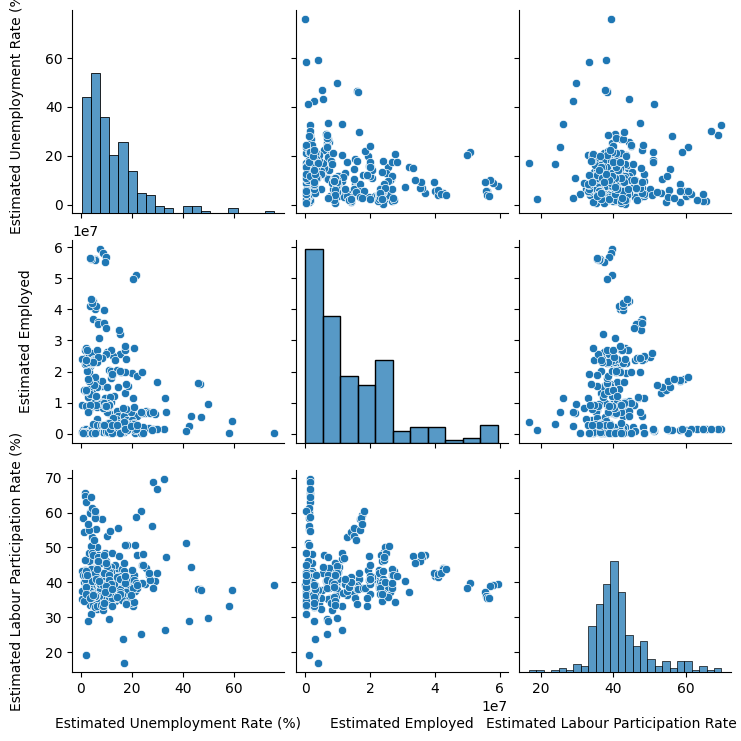

In [9]:
plt.rc("axes", labelpad=15)
plt.figure(figsize=(16, 10))
sns.pairplot(data=df)

The result indicates that the data doesn't have explicit problem

#### Convert the Date to datetime

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   States                                   267 non-null    object        
 1   Date                                     267 non-null    datetime64[ns]
 2   Estimated Unemployment Rate (%)          267 non-null    float64       
 3   Estimated Employed                       267 non-null    int64         
 4   Estimated Labour Participation Rate (%)  267 non-null    float64       
 5   Region                                   267 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 12.6+ KB


#### Create month feature for visualization

In [11]:
df['Month'] = df['Date'].dt.month

df.drop('Date', axis='columns', inplace=True)

df.head()

,States,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region,Month
0,Andhra Pradesh,5.48,16635535,41.02,South,1
1,Andhra Pradesh,5.83,16545652,40.90,South,2
2,Andhra Pradesh,5.79,15881197,39.18,South,3
3,Andhra Pradesh,20.51,11336911,33.10,South,4
4,Andhra Pradesh,17.43,12988845,36.46,South,5


### Visualization

#### Check correlation between features

<AxesSubplot: >

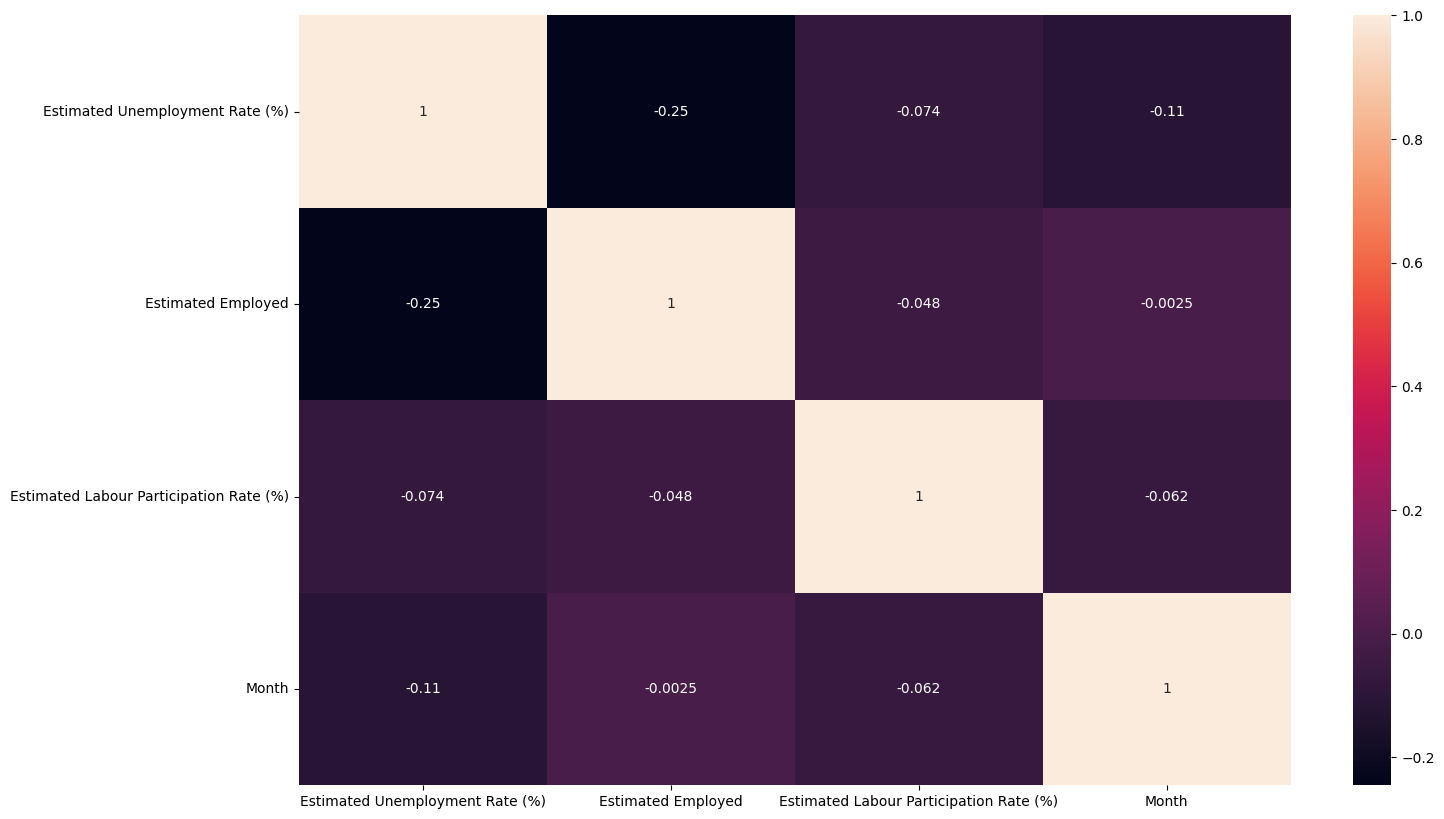

In [12]:
plt.figure(figsize=(16,10))
sns.heatmap(data=df.corr(numeric_only=True), annot=True)

#### Check the number of data recorded in each region and states

In [13]:
df['States'].value_counts()

Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: States, dtype: int64

In [14]:
df['Region'].value_counts()

North        79
South        60
West         50
East         40
Northeast    38
Name: Region, dtype: int64

<AxesSubplot: xlabel='Region', ylabel='count'>

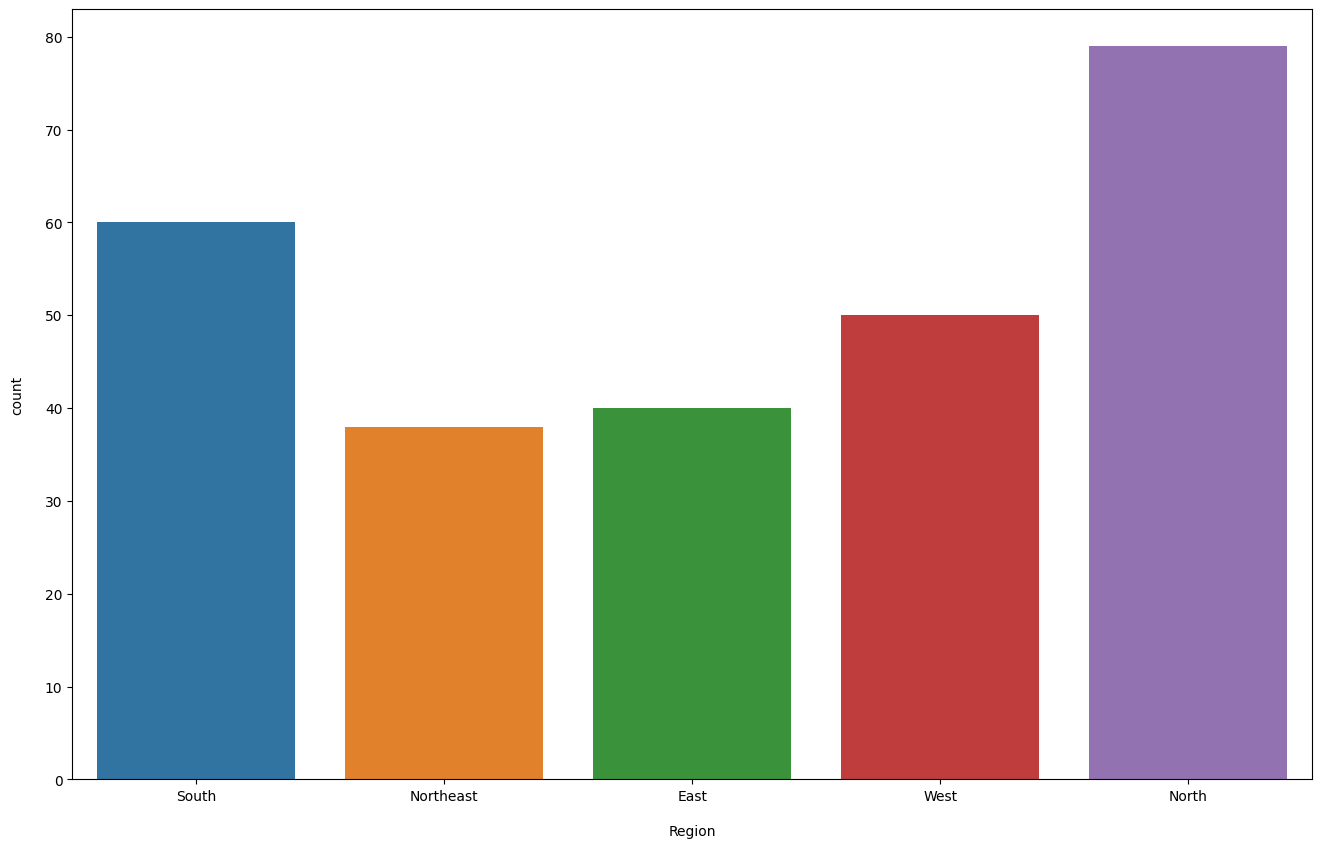

In [15]:
plt.figure(figsize=(16, 10))
sns.countplot(data=df, x='Region')

We can see that the data evenly separated in each region but there are more states in North

#### Check unemployment rate in each state

<AxesSubplot: xlabel='Estimated Unemployment Rate (%)', ylabel='States'>

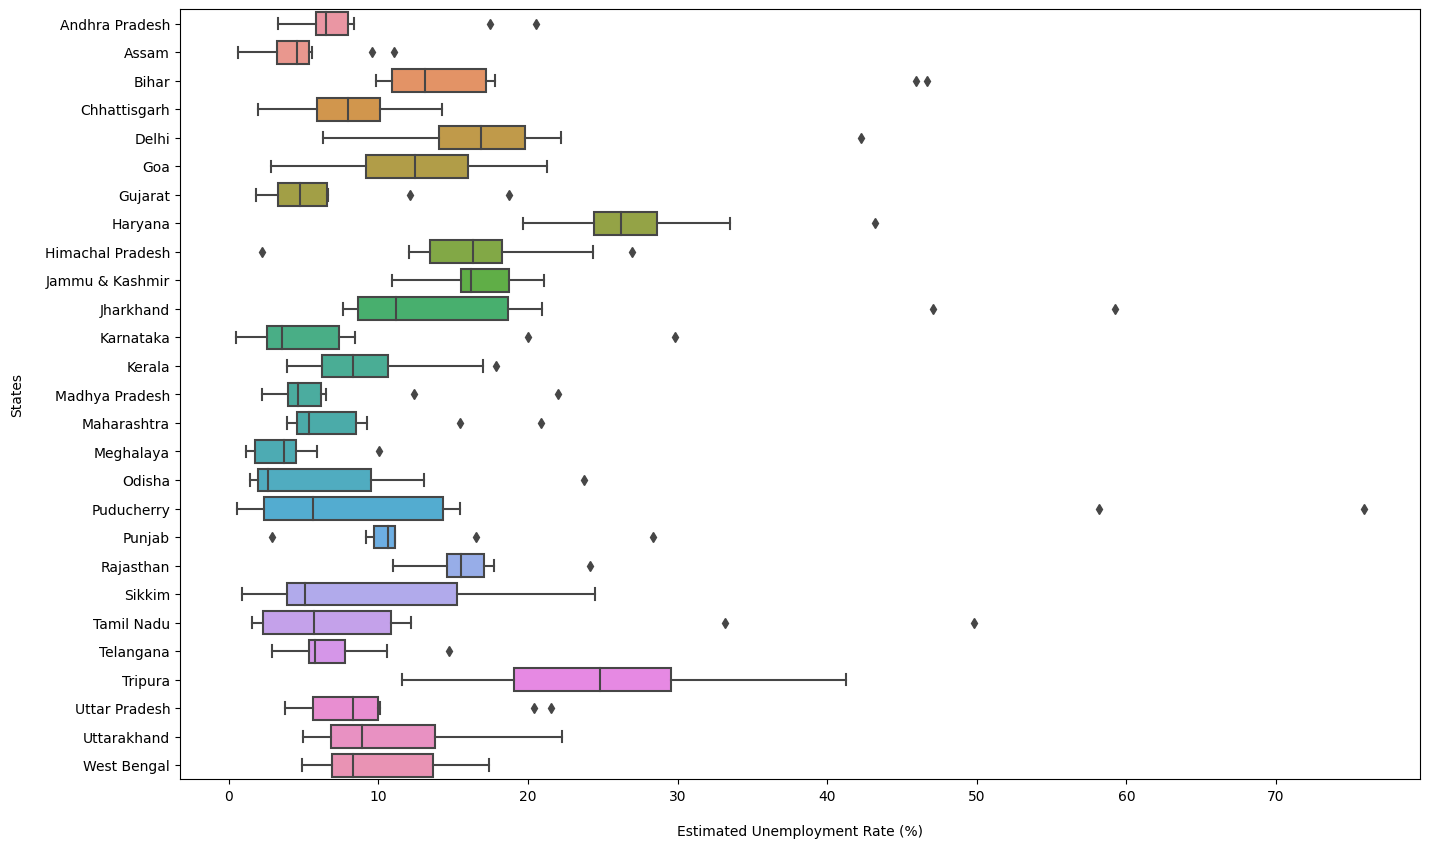

In [16]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=df, y='States', x='Estimated Unemployment Rate (%)')

#### Check average unemployment rate in each state

In [17]:
aur_df = df[['States', 'Estimated Unemployment Rate (%)']].groupby('States').mean().reset_index()
aur_df = aur_df.sort_values(by='Estimated Unemployment Rate (%)', ascending=False)

aur_df.head()

,States,Estimated Unemployment Rate (%)
7,Haryana,27.477
23,Tripura,25.055
10,Jharkhand,19.539
2,Bihar,19.471
4,Delhi,18.414


<AxesSubplot: xlabel='Estimated Unemployment Rate (%)', ylabel='States'>

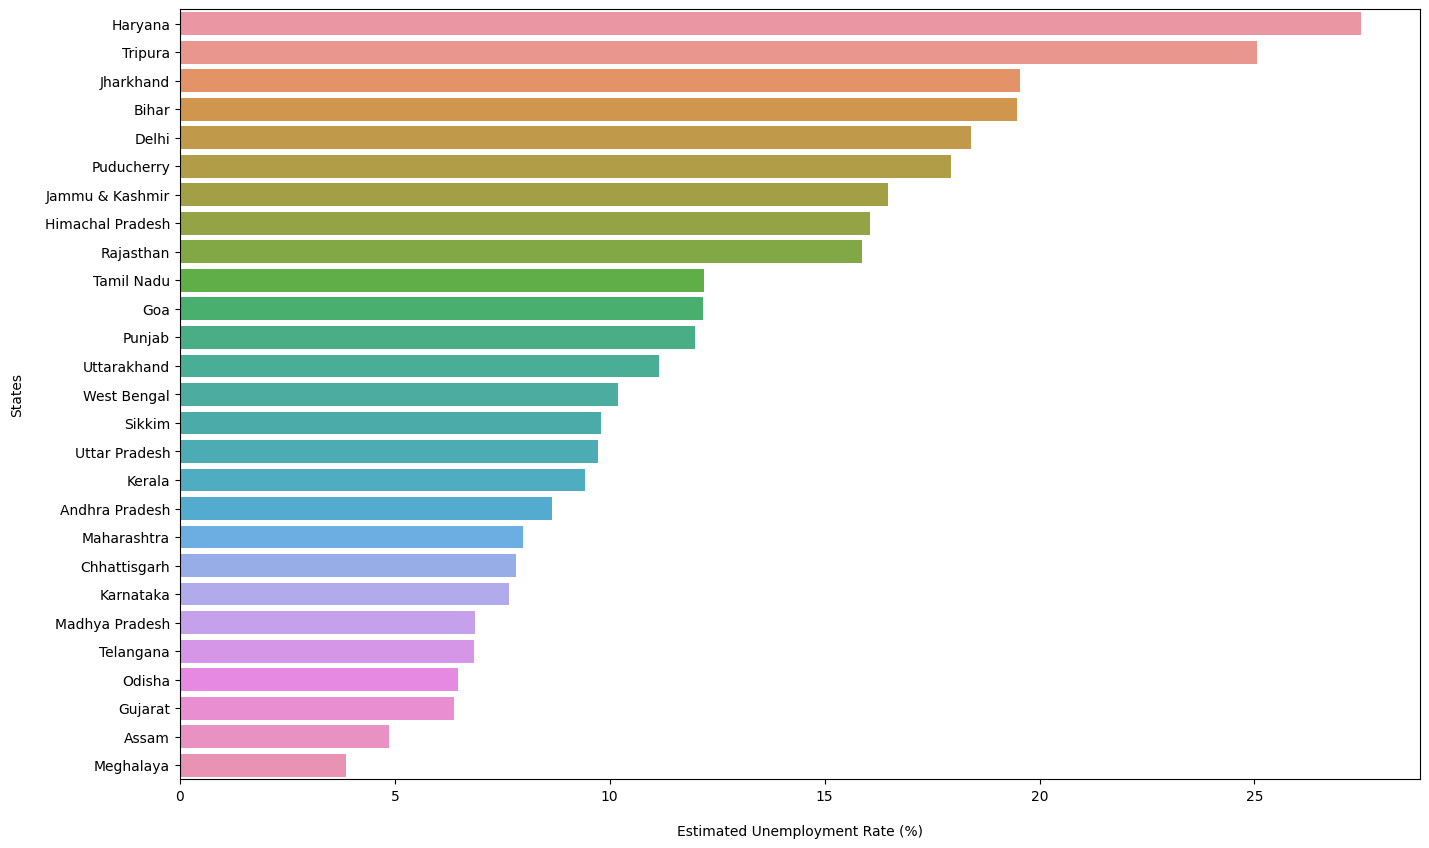

In [18]:
plt.figure(figsize=(16, 10))
sns.barplot(data=aur_df, y='States', x='Estimated Unemployment Rate (%)')

Top 5 states with highest unemployment rate

1. Haryana
2. Tripura
3. Jharkhand
4. Bihar
5. Delhi

#### Check unemployment rate in each region from Jan. 2020 to Oct. 2020

In [19]:
aur_df = df[['Region', 'Estimated Unemployment Rate (%)']].groupby('Region').mean().reset_index()
aur_df = aur_df.sort_values(by='Estimated Unemployment Rate (%)')

aur_df.head()

,Region,Estimated Unemployment Rate (%)
4,West,8.239000
3,South,10.454667
2,Northeast,10.950263
0,East,13.916000
1,North,15.889620


<AxesSubplot: xlabel='Region', ylabel='Estimated Unemployment Rate (%)'>

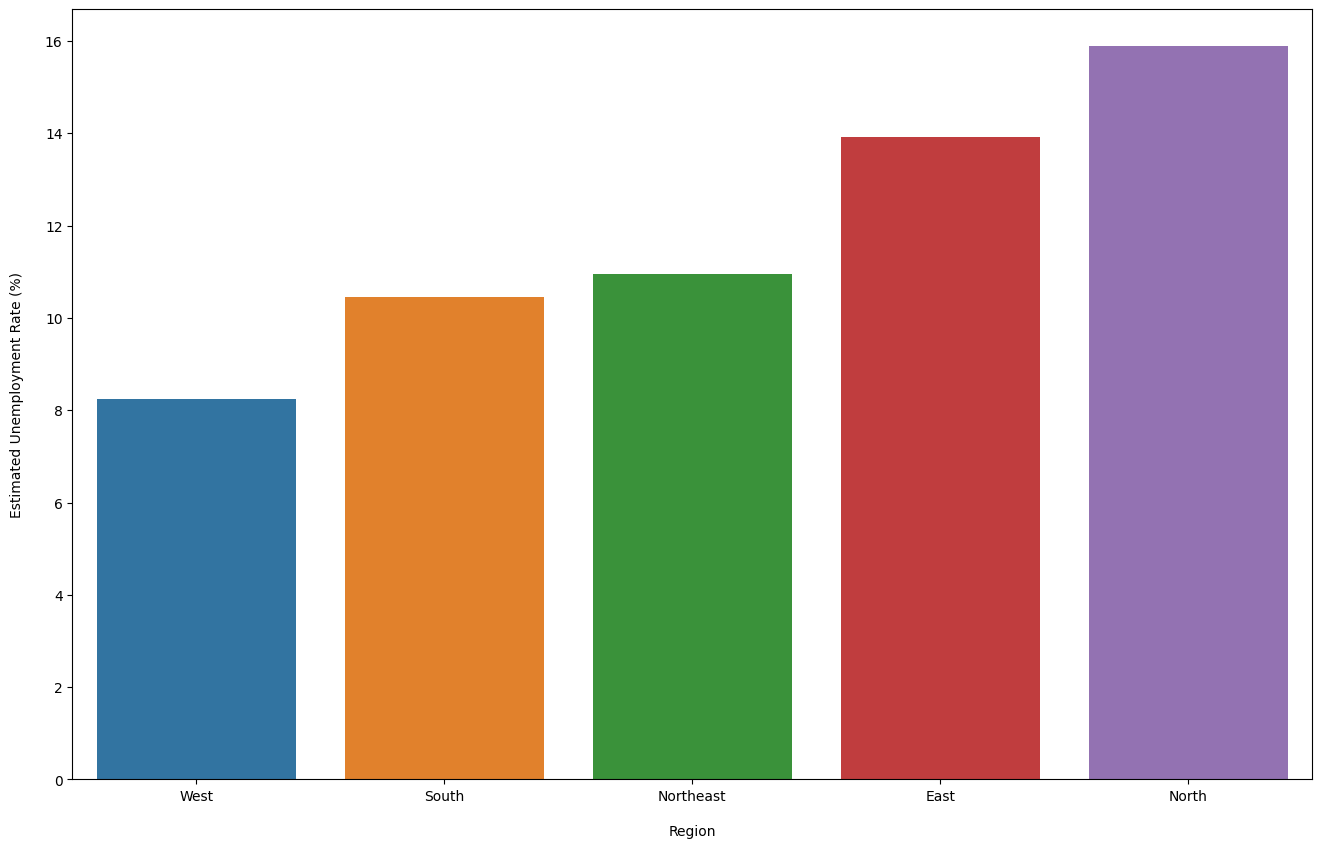

In [20]:
plt.figure(figsize=(16, 10))
sns.barplot(data=aur_df, x='Region', y='Estimated Unemployment Rate (%)', errorbar=None)

<AxesSubplot: xlabel='Region', ylabel='Estimated Unemployment Rate (%)'>

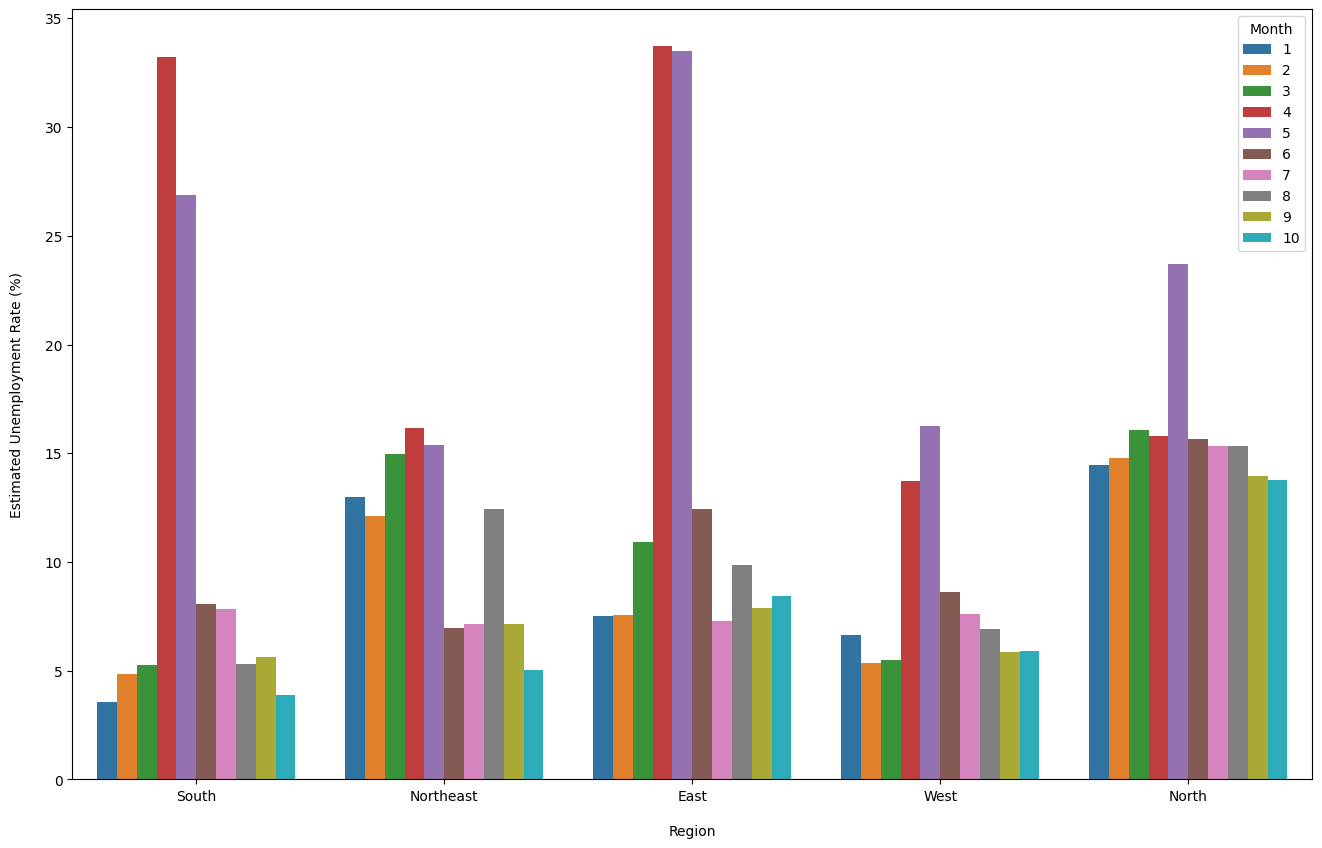

In [21]:
plt.figure(figsize=(16, 10))
sns.barplot(data=df, x='Region', y='Estimated Unemployment Rate (%)', hue='Month', errorbar=None)

Before lock-down, North area has the highest unemployment rate

The period of lock-down is from March to May, and it's strongly increase the unemployment rate in all of the region, especially in the region of South and East

#### Check unemployment rate before, during and after lock-down

In [201]:
bf_lock_df = df[(df['Month'] >= 1) & (df['Month'] <= 3)][['States', 'Estimated Unemployment Rate (%)']]
af_lock_df = df[(df['Month'] >= 3) & (df['Month'] <= 5)][['States', 'Estimated Unemployment Rate (%)']]

In [202]:
bf_lock_df = bf_lock_df.groupby('States')['Estimated Unemployment Rate (%)'].mean().reset_index().rename(columns={'Estimated Unemployment Rate (%)':'Unemployment Rate before Lock-Down'})
af_lock_df = af_lock_df.groupby('States')['Estimated Unemployment Rate (%)'].mean().reset_index().rename(columns={'Estimated Unemployment Rate (%)':'Unemployment Rate after Lock-Down'})

In [203]:
bf_lock_df['Percentage Change in Unemployment'] = round((af_lock_df['Unemployment Rate after Lock-Down'] - bf_lock_df['Unemployment Rate before Lock-Down']) / bf_lock_df['Unemployment Rate before Lock-Down'], 2)

In [204]:
bf_lock_df['Unemployment Rate after Lock-Down'] = af_lock_df['Unemployment Rate after Lock-Down']

In [205]:
plot_df = bf_lock_df.sort_values('Percentage Change in Unemployment', ascending=False)

<AxesSubplot: xlabel='Percentage Change in Unemployment', ylabel='States'>

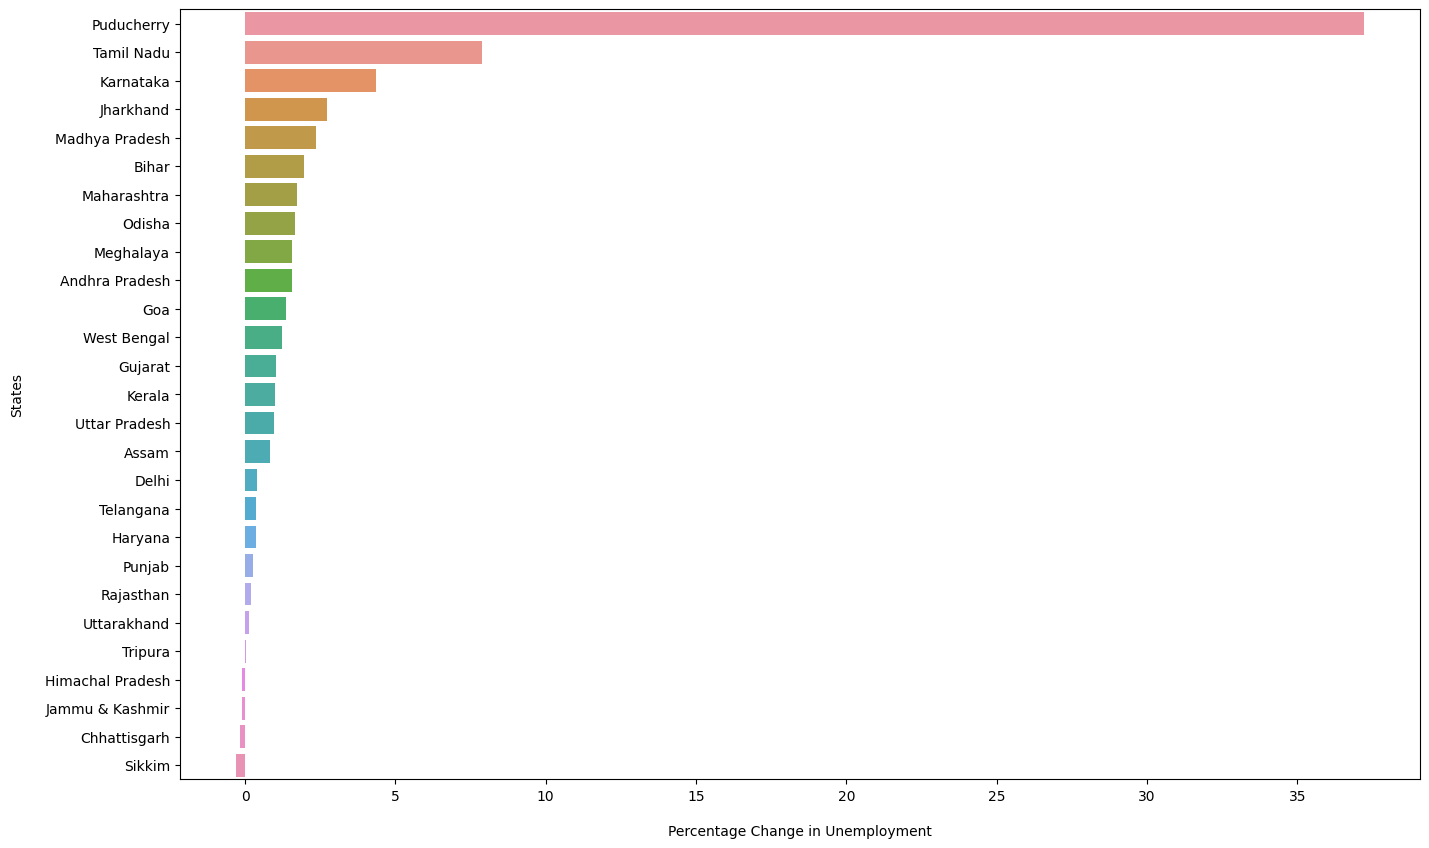

In [206]:
plt.figure(figsize=(16, 10))
sns.barplot(data=plot_df, y='States', x='Percentage Change in Unemployment')

As we can see above, Puducherry's unemployment rate had been seriously impacted by the lock-down

#### Sort the impact level in each states

In [207]:
def sort_impact_level(x):
    if x > 20:
        return 'hardest impacted states'
    elif x > 10:
        return 'harder impacted states'
    elif x > 5:
        return 'hard impacted states'
    elif x > 0:
        return 'impacted states'
    else:
        return 'not impacted states'

In [209]:
plot_df['Impact Status'] = plot_df['Percentage Change in Unemployment'].apply(lambda x:sort_impact_level(x))

<AxesSubplot: xlabel='Percentage Change in Unemployment', ylabel='States'>

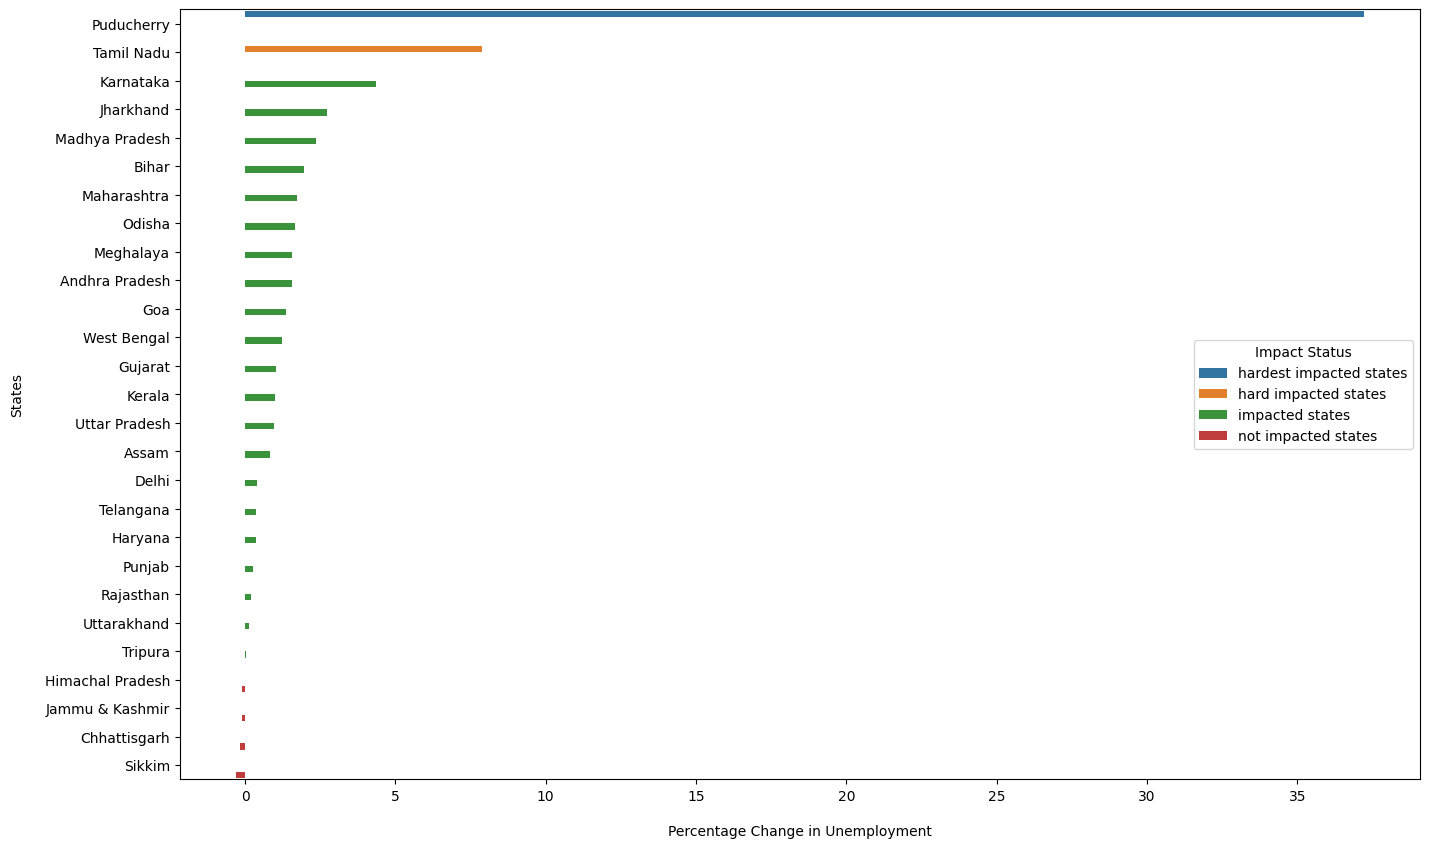

In [230]:
plt.figure(figsize=(16, 10))
sns.barplot(data=plot_df, y='States', x='Percentage Change in Unemployment', hue='Impact Status', width=0.9)